In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import random
random.seed(2021)

Informe tarea sustemas diagnósticos y tratamiento

In [ ]:
# Primero debemos importar la base de datos

# Aquí es importante utilizar coma como decimal
database = pd.read_csv("Dryad data.csv", ";", decimal = ",")

# Leemos los primeros 5 datos
database.head()

,PtCODE,PsoasR,PsoasL,IliacusR,IliacusL,Glutei MaximumR,Glutei MaximumL,Glutei MediusR,Glutei MediusL,Glutei MinorR,Glutei MinorL,Tensor fasciae lataeR,Tensor fasciae lataeL,PiriformisR,PiriformisL,Obturatorius internusR,Obturatorius internusL,Obturatorius externusR,Obturatorius externusL,PectineusR,PectineusL,Adductor brevisR,Adductor brevisL,Quadratus femorisR,Quadratus femorisL,Adductor longusR,Adductor longusL,Adductor majorR,Adductor majorL,Rectus femorisR,Rectus femorisL,Vastus lateralisR,Vastus lateralisL,Vastus intermediusR,Vastus intermediusL,Vastus medialisR,Vastus medialisL,SartoriusR,SartoriusL,GracillisR,GracillisL,SemimembranosusR,SemimembranosusL,SemitendinosusR,SemitendinosusL,Biceps long headR,Biceps long headL,Biceps short headR,Biceps short headL,Tibialis anteriorR,Tibialis anteriorL,Extensor digitorumR,Extensor digitorumL,Peroneus longusR,Peroneus longusL,Peroneus brevisR,Peroneus brevisL,Gastrocnemius medialisR,Gastrocnemius medialisL,Gastrocnemius lateralisR,Gastrocnemius laterallisL,SoleusR,SoleusL,Flexor digitorumR,Flexor digitorumL,Tibialis PosteriorR,Tibialis PosteriorL,PoplitealR,PoplitealL,FHL R,FHL L
0,FKRP1,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,FKRP2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FKRP3,NaN,NaN,NaN,NaN,3.0,3.0,4.0,4.0,4.0,4.0,1.0,1.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,4.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FKRP4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,1.0,1.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,NaN
4,FKRP5,NaN,NaN,NaN,NaN,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,3.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Describimos la base de datos
database.describe()

,PsoasR,PsoasL,IliacusR,IliacusL,Glutei MaximumR,Glutei MaximumL,Glutei MediusR,Glutei MediusL,Glutei MinorR,Glutei MinorL,Tensor fasciae lataeR,Tensor fasciae lataeL,PiriformisR,PiriformisL,Obturatorius internusR,Obturatorius internusL,Obturatorius externusR,Obturatorius externusL,PectineusR,PectineusL,Adductor brevisR,Adductor brevisL,Quadratus femorisR,Quadratus femorisL,Adductor longusR,Adductor longusL,Adductor majorR,Adductor majorL,Rectus femorisR,Rectus femorisL,Vastus lateralisR,Vastus lateralisL,Vastus intermediusR,Vastus intermediusL,Vastus medialisR,Vastus medialisL,SartoriusR,SartoriusL,GracillisR,GracillisL,SemimembranosusR,SemimembranosusL,SemitendinosusR,SemitendinosusL,Biceps long headR,Biceps long headL,Biceps short headR,Biceps short headL,Tibialis anteriorR,Tibialis anteriorL,Extensor digitorumR,Extensor digitorumL,Peroneus longusR,Peroneus longusL,Peroneus brevisR,Peroneus brevisL,Gastrocnemius medialisR,Gastrocnemius medialisL,Gastrocnemius lateralisR,Gastrocnemius laterallisL,SoleusR,SoleusL,Flexor digitorumR,Flexor digitorumL,Tibialis PosteriorR,Tibialis PosteriorL,PoplitealR,PoplitealL,FHL R,FHL L
count,744.000000,744.000000,753.000000,753.000000,904.000000,904.000000,813.000000,814.000000,809.000000,809.000000,594.000000,593.000000,704.000000,704.000000,776.000000,776.000000,795.000000,795.000000,877.000000,877.000000,898.000000,898.000000,767.000000,767.000000,933.000000,933.000000,968.00000,968.000000,972.00000,972.000000,974.000000,974.000000,974.000000,974.000000,966.000000,967.000000,972.000000,972.000000,974.000000,974.000000,969.000000,969.000000,971.000000,971.000000,971.000000,971.000000,934.000000,934.000000,961.000000,961.00000,889.000000,889.000000,938.000000,936.000000,865.000000,863.000000,965.000000,965.000000,963.000000,963.000000,964.000000,964.000000,840.000000,840.000000,936.000000,936.000000,766.000000,766.000000,791.000000,791.000000
mean,0.973118,0.985215,1.066401,1.073041,1.459071,1.460177,1.688807,1.701474,2.166873,2.142151,1.626263,1.647555,0.853693,0.897727,0.762887,0.747423,0.974843,0.964780,1.278221,1.255416,1.541203,1.527840,1.496741,1.479791,1.811361,1.771704,2.35124,2.341942,1.36214,1.324074,1.503080,1.464066,1.726899,1.678645,1.660455,1.629783,0.911523,0.891975,0.951745,0.935318,2.495356,2.481940,1.885685,1.889804,2.252317,2.230690,1.423983,1.385439,1.242456,1.17898,1.107987,1.057368,1.205757,1.177350,1.136416,1.118192,1.727461,1.716062,1.316719,1.317757,1.773859,1.750000,0.533333,0.544048,0.590812,0.590812,0.244125,0.253264,0.968394,0.989886
std,1.466294,1.466007,1.578058,1.582393,1.355227,1.342122,1.515222,1.524082,1.563219,1.563290,1.647232,1.655937,1.438117,1.469770,1.430710,1.420811,1.531161,1.529316,1.705522,1.710426,1.706756,1.703758,1.779541,1.776492,1.707343,1.720980,1.56770,1.563485,1.60731,1.608716,1.461212,1.462179,1.640744,1.636686,1.566697,1.572098,1.275771,1.289128,1.361160,1.360478,1.580560,1.569312,1.681406,1.653241,1.666276,1.660433,1.597192,1.563669,1.575366,1.55363,1.519999,1.498526,1.491809,1.489557,1.495326,1.495525,1.654029,1.663060,1.598596,1.604556,1.574954,1.580236,1.232780,1.245909,1.220275,1.234218,0.839661,0.851655,1.487590,1.511106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

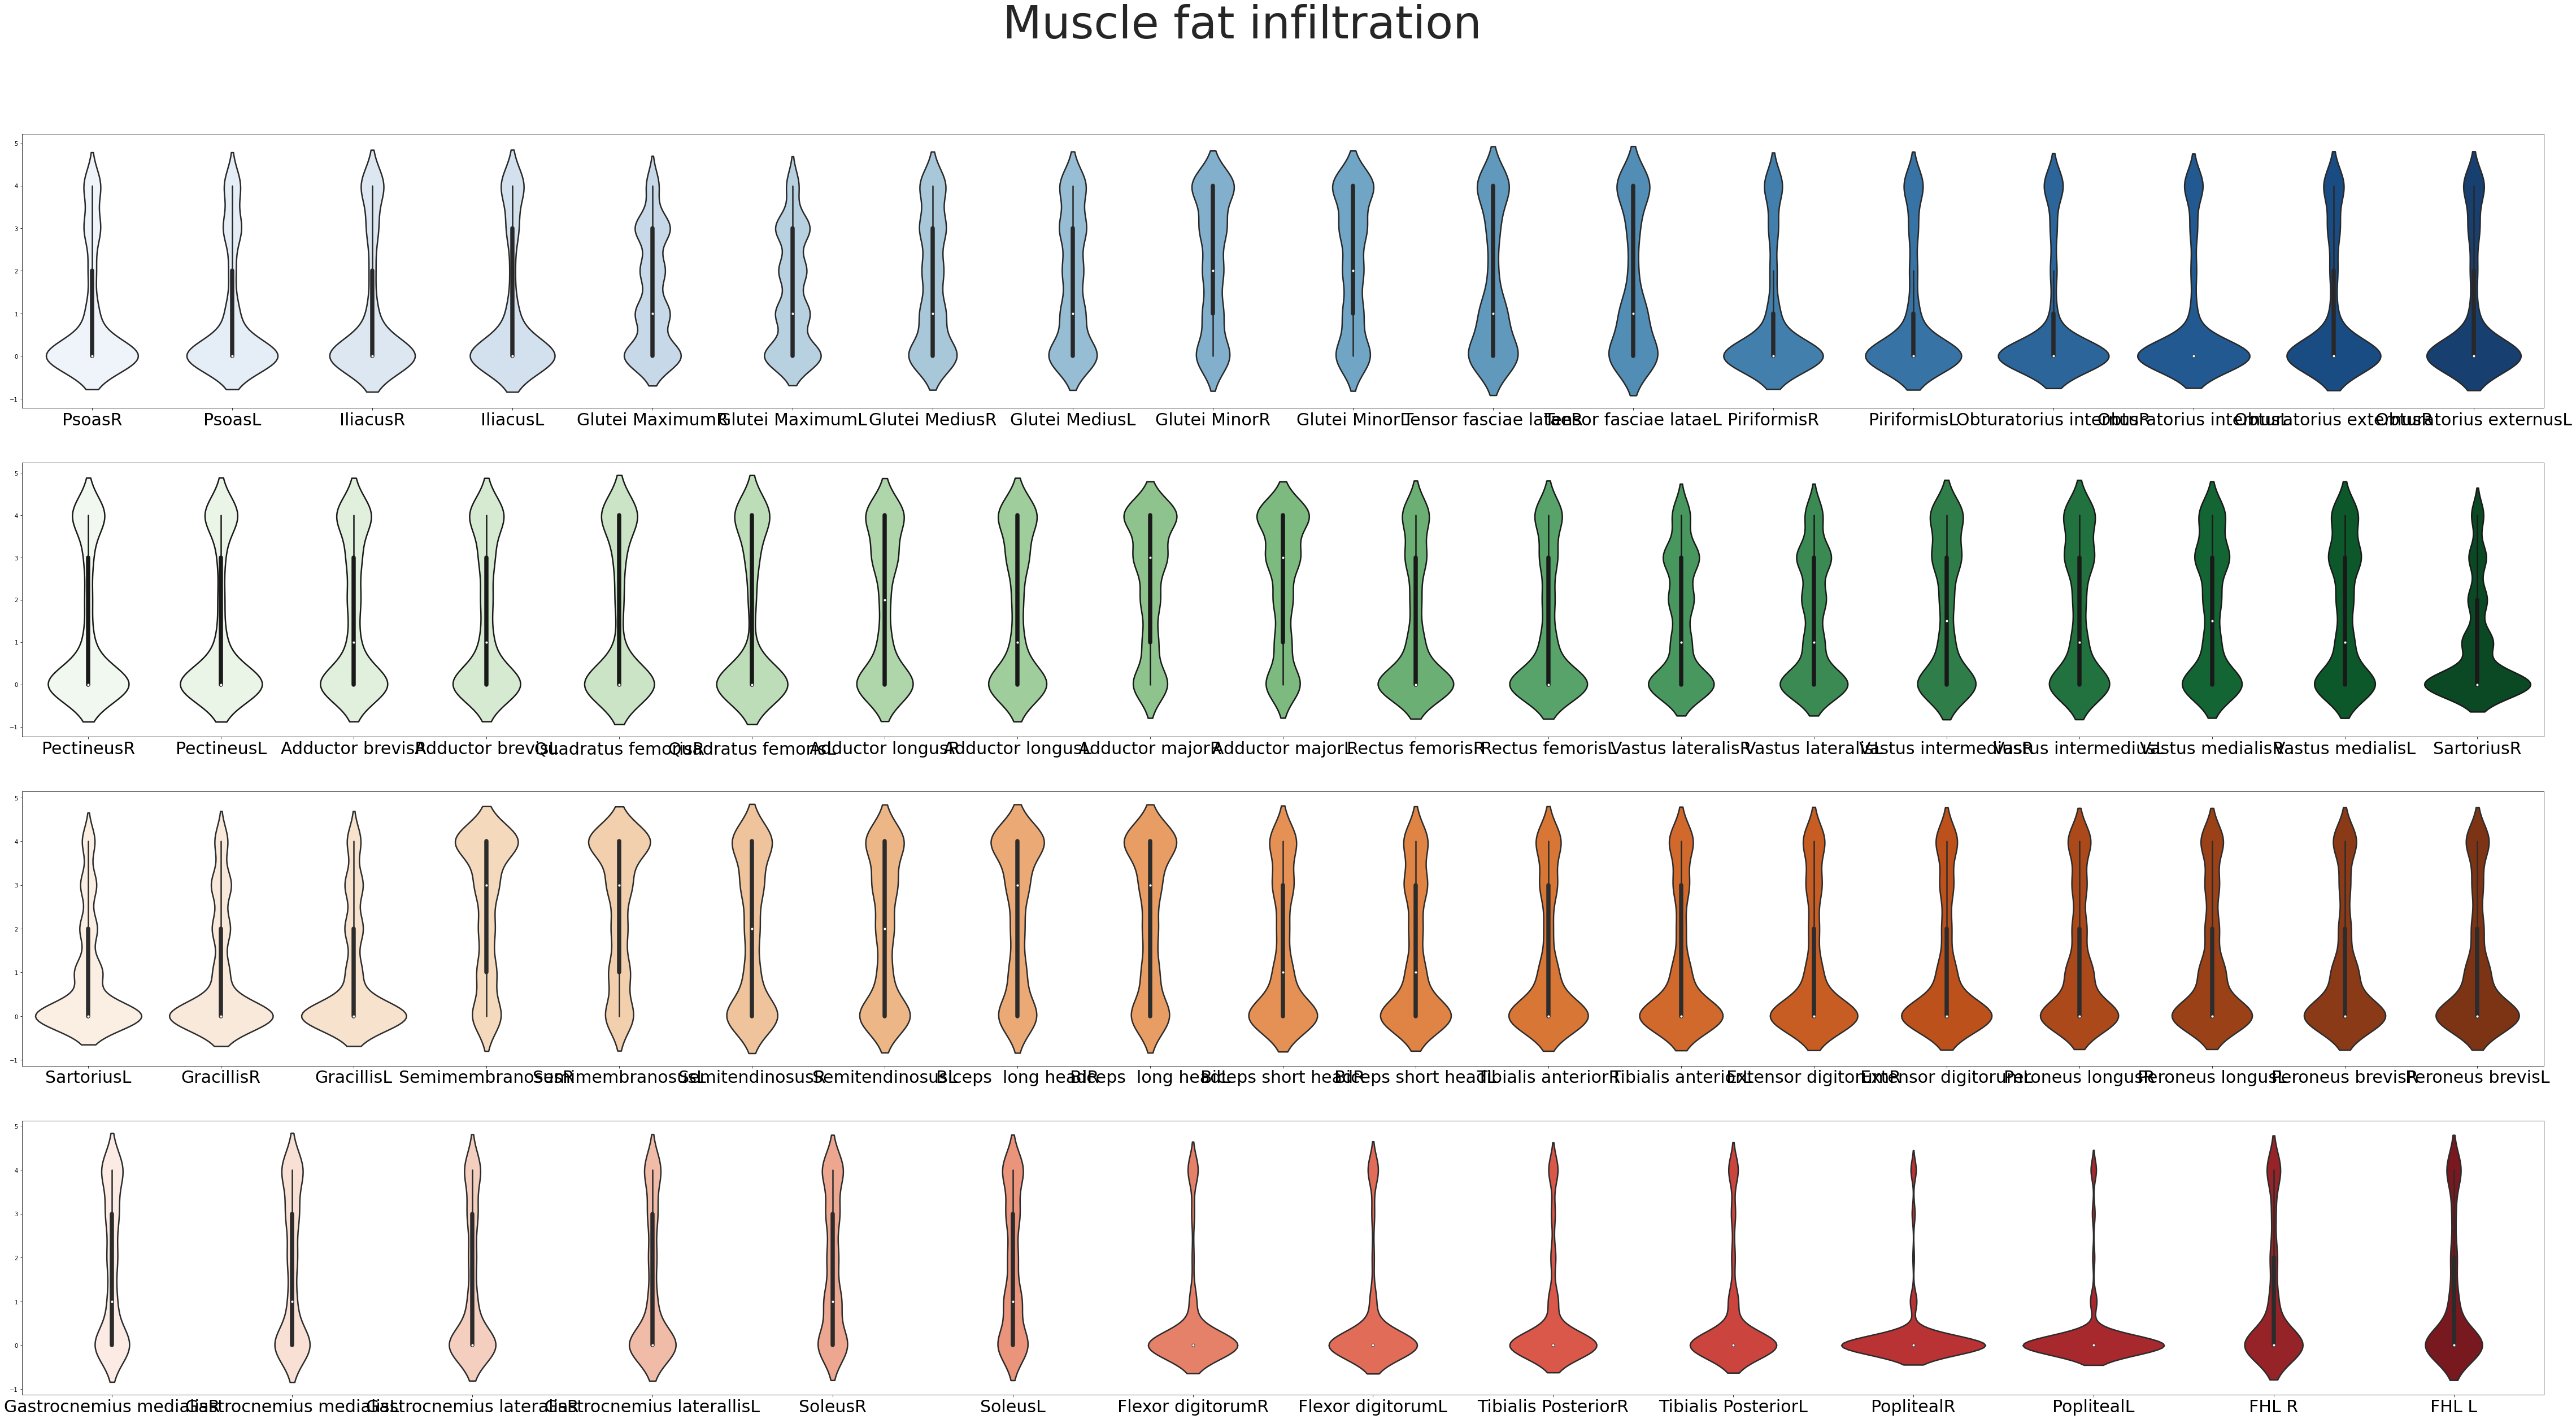

In [ ]:
fig, ax = plt.subplots(4,1,
                       figsize=(80,40)) 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.2,
                              "axes.labelsize" : 25})

sns.set_context("paper", font_scale=0.9) 

database1 = database.iloc[:,:19]
database2 = database.iloc[:,19:38]
database3 = database.iloc[:,38:57]
database4 = database.iloc[:,57:76]


g1 = sns.violinplot(data = database1,
           palette = "Blues", ax=ax[0], linewidth=2.5 )

g2 = sns.violinplot(data = database2,
           palette = "Greens", ax=ax[1], linewidth=2.5 )

g3 = sns.violinplot(data = database3,
           palette = "Oranges", ax=ax[2], linewidth=2.5 )

g4 = sns.violinplot(data = database4,
           palette = "Reds", ax=ax[3], linewidth=2.5 )

plt.suptitle("Muscle fat infiltration", fontsize = 80 )

g1.set_xticklabels(g1.get_xmajorticklabels(), fontsize = 30)
g2.set_xticklabels(g2.get_xmajorticklabels(), fontsize = 30)
g3.set_xticklabels(g3.get_xmajorticklabels(), fontsize = 30)
g4.set_xticklabels(g4.get_xmajorticklabels(), fontsize = 30)

fig.subplots_adjust( top = 0.9 ) 

In [ ]:
import re
reg = "[^D{3-6}$]"
names = list(database["PtCODE"])

targets = []
for i in range(975):
    x = re.findall("\D", names[i]) 
    targets.append(x)
t = []

for i in range(975):
    x = "".join(targets[i])
    t.append(x)
t = np.array(t).reshape(975)
t

array(['FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP',
       'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP',
       'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP',
       'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP', 'FKRP',
       'FKRP', 'FKRP', 'FKRP', 'FKRP', 'Pompe ', 'Pompe ', 'Pompe ',
       'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ',
       'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ',
       'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ',
       'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ',
       'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ',
       'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ',
       'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ',
       'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ',
       'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ', 'Pompe ',
       'Pompe ', 'Pompe ', 'Pompe ', 'Pompe 

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(t)
targets = le.transform(t)

In [ ]:
list(le.classes_)

['Ano',
 'CAPN',
 'Dysf',
 'Dyst',
 'FKRP',
 'FSH',
 'Lamina ',
 'OPMD ',
 'Pompe ',
 'Sarco ']

In [ ]:
c = list(database.columns)
del c[1:128:2]
test = c
newtest = [x[:-1] for x in test]

a = np.arange(1,76,2)
b = np.arange(2,76,2)

a, b
nmd_sum = pd.DataFrame()

for i,j,k in list(zip(newtest[1:],a,b)) :
    nmd_sum[i] = (database.iloc[:,j] + database.iloc[:,k])/2

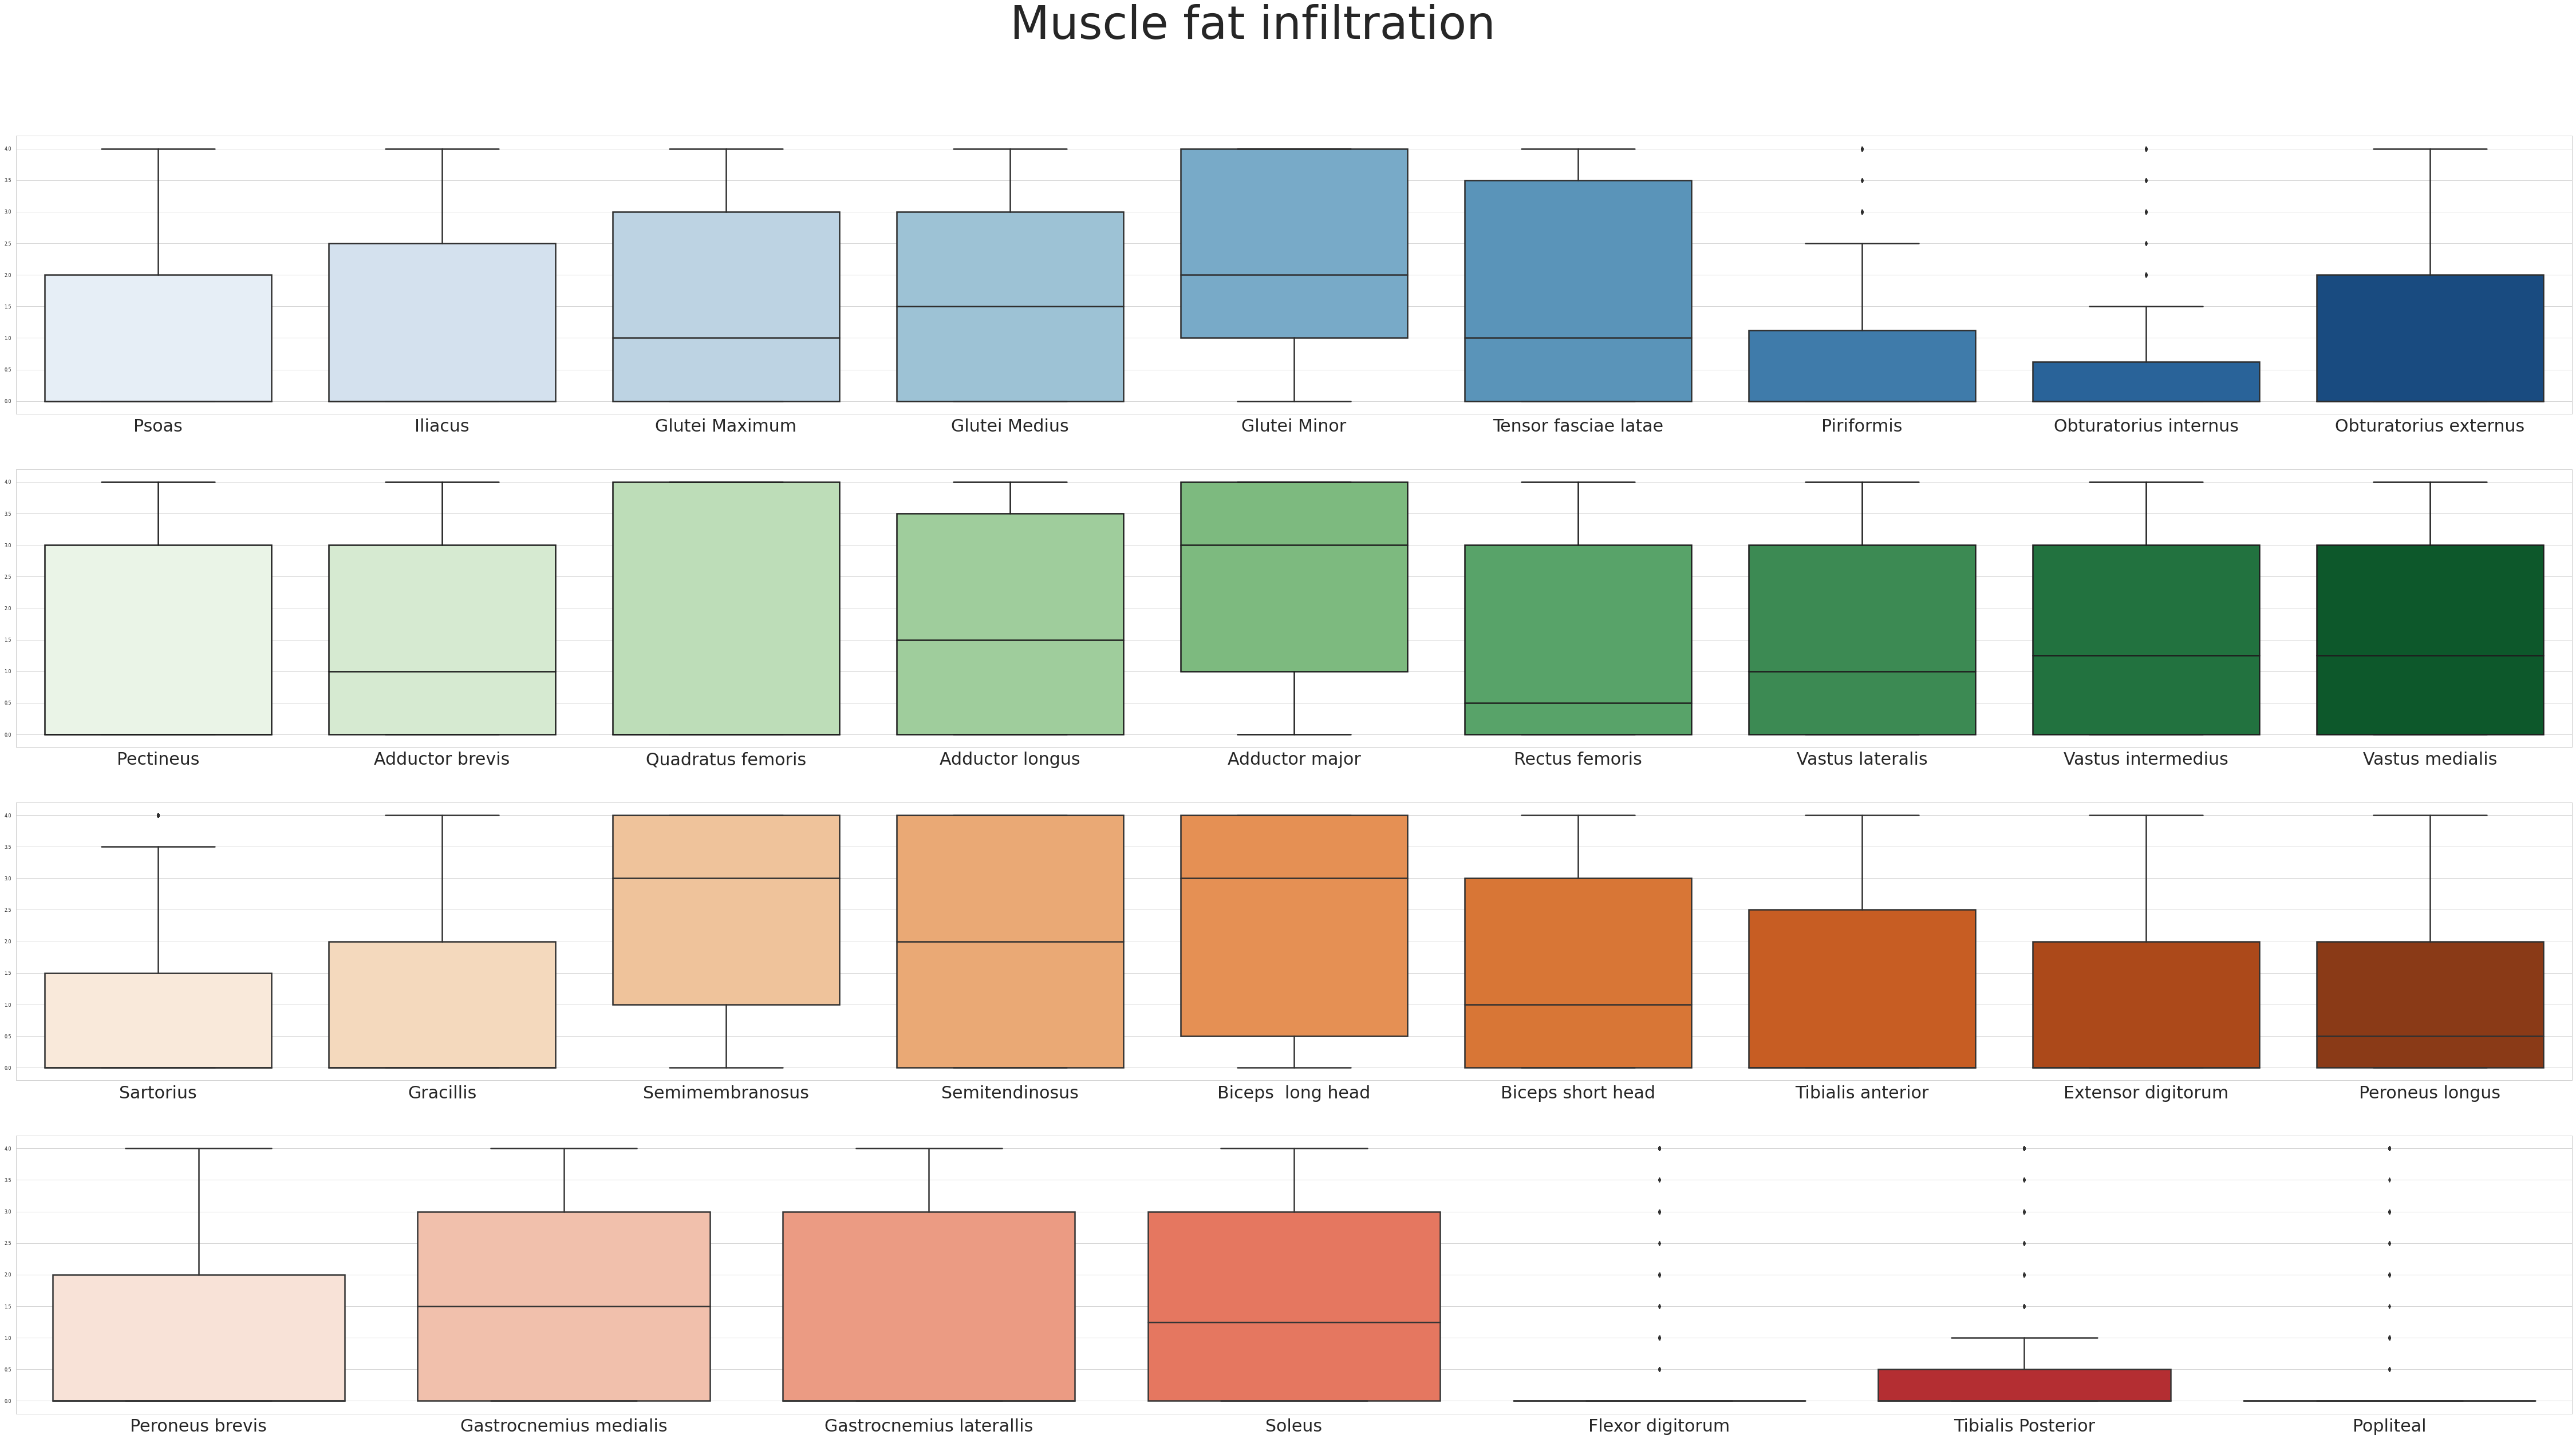

In [ ]:
# Aqui instanciamos la figura, sus ejes y el estilo
fig, ax = plt.subplots(4,1,
                       figsize=(80,40)) 
sns.set(style='whitegrid', rc={"grid.linewidth": 0.2,
                              "axes.labelsize" : 25})

sns.set_context("paper", font_scale=0.9) 

# Aqui estamos indexandoy creando 4 subbases de datos
nmd_sum1 = nmd_sum.iloc[:,:9]
nmd_sum2 = nmd_sum.iloc[:,9:18]
nmd_sum3 = nmd_sum.iloc[:,18:27]
nmd_sum4 = nmd_sum.iloc[:,27:34]

# Aqui vamos a hacer los graficos 
g1 = sns.boxplot(data = nmd_sum1,
           palette = "Blues", ax=ax[0], linewidth=2.5 )

g2 = sns.boxplot(data = nmd_sum2,
           palette = "Greens", ax=ax[1], linewidth=2.5 )

g3 = sns.boxplot(data = nmd_sum3,
           palette = "Oranges", ax=ax[2], linewidth=2.5 )

g4 = sns.boxplot(data = nmd_sum4,
           palette = "Reds", ax=ax[3], linewidth=2.5 )

# Agregamos un titulo
plt.suptitle("Muscle fat infiltration", fontsize = 80 )

# Definimos el tamaño de los etiquetas
g1.set_xticklabels(g1.get_xmajorticklabels(), fontsize = 30)
g2.set_xticklabels(g2.get_xmajorticklabels(), fontsize = 30)
g3.set_xticklabels(g3.get_xmajorticklabels(), fontsize = 30)
g4.set_xticklabels(g4.get_xmajorticklabels(), fontsize = 30)

fig.subplots_adjust( top = 0.9 ) 

# Grabar la figura
plt.savefig("muscle-fat-infiltration.tiff", dpi = 300)

In [ ]:
# Esta es la funcion missing value, permite identificar el numero de valores perdidos.
# recibe como input un data frame y como output realiza un print.
def missing_values(df):
    print("Missing Values")
    for i in df.columns:
        if (df[i].dtype == "float64"):
            print(i + ": "+ str(df[i].isnull().sum()) )
        elif (df[i].dtype == "int64"):
            print(i + ": "+ str(df[i].isnull().sum()) )
                         
sadf = nmd_sum.dropna(thresh=1, axis=0)
sadf = sadf.dropna(thresh=10, axis=1)
sadf.describe()
missing_values(sadf)

Missing Values
Psoas: 231
Iliacus: 222
Glutei Maximum: 71
Glutei Medius: 162
Glutei Minor: 166
Tensor fasciae latae: 382
Piriformis: 271
Obturatorius internus: 199
Obturatorius externus: 180
Pectineus: 98
Adductor brevis: 77
Quadratus femoris: 208
Adductor longus: 42
Adductor major: 7
Rectus femoris: 3
Vastus lateralis: 1
Vastus intermedius: 1
Vastus medialis: 9
Sartorius: 3
Gracillis: 1
Semimembranosus: 6
Semitendinosus: 4
Biceps  long head: 4
Biceps short head: 41
Tibialis anterior: 14
Extensor digitorum: 86
Peroneus longus: 39
Peroneus brevis: 112
Gastrocnemius medialis: 10
Gastrocnemius laterallis: 12
Soleus: 11
Flexor digitorum: 135
Tibialis Posterior: 39
Popliteal: 209
FHL : 184


In [ ]:
filtcol = []
for c in sadf.columns: 
    if np.mean(sadf[c].isnull()) <= 0.2:
        filtcol.append(c)
f_data = sadf[filtcol]

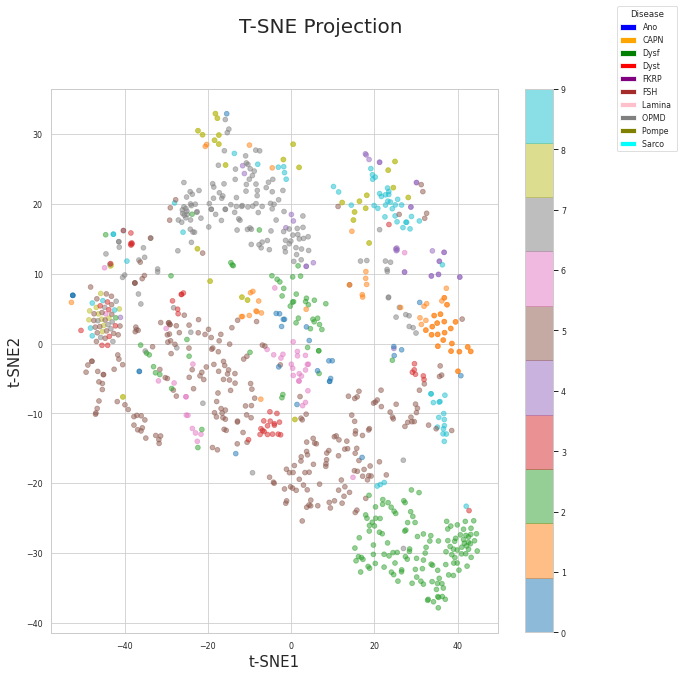

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib.patches import Patch

# llamamos a un objeto de la clase TSNE
tsne_2d = TSNE(2, perplexity=25) # Este parametro es el que se debe ajustar. 

# Aqui realizamos una inputacióón de los datos utilizando la media. 
nmd_2d= tsne_2d.fit_transform(f_data.fillna(np.mean(f_data)).iloc[:,:-1])

# Instanciamos la fiura y los ejes, y graficamos los resultados
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.scatter(
    nmd_2d[:,0],
    nmd_2d[:,1],
    c= targets,
    alpha = 0.5,
    cmap='tab10'
)

# Aca instanciamos la legenda y la barra de colores del grafico
plt.colorbar()
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "grey", "olive", "cyan"] 
lut = dict(zip(list(le.classes_), colors))
row_colors = pd.Series(t).map(lut)
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Disease',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

# Aca definimos el titulo y los ejes
plt.suptitle("T-SNE Projection", fontsize = 20 )
plt.xlabel('t-SNE1', axes=ax, fontsize=15)
plt.ylabel('t-SNE2', axes=ax, fontsize=15)

# Grabar la figura
plt.savefig("t-sne2D.tiff", dpi = 300)

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 975 samples in 0.003s...
[t-SNE] Computed neighbors for 975 samples in 0.195s...
[t-SNE] Computed conditional probabilities for sample 975 / 975
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.944550
[t-SNE] KL divergence after 1000 iterations: 0.712094


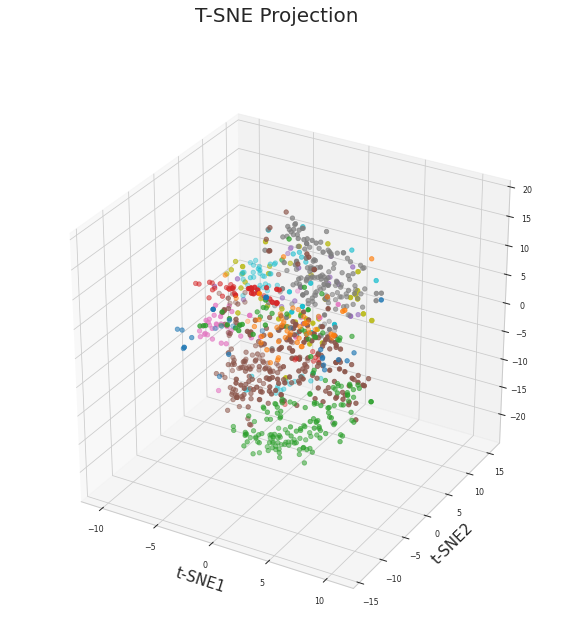

In [ ]:
from mpl_toolkits.mplot3d import Axes3D # Revisar su utilidad ?

# Instanciamos el objeto TSNE, defimos la perplejidad en 24 e imputamos la media 
# en los datos
tsne3d = TSNE(3, perplexity = 25,verbose=1)
nmd_3d = tsne3d.fit_transform(f_data.fillna(np.mean(f_data)))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*nmd_3d),c=targets,cmap='tab10')

plt.suptitle("T-SNE Projection", fontsize = 20 )
plt.xlabel('t-SNE1', axes=ax, fontsize=15)
plt.ylabel('t-SNE2', axes=ax, fontsize=15)

plt.savefig("t-sne-3D.tiff", dpi = 300)
plt.show()

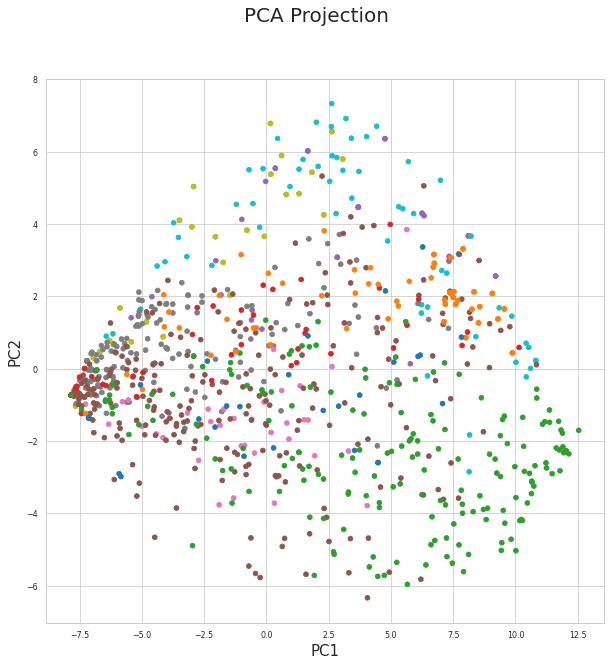

In [ ]:
from sklearn.decomposition import PCA

# Instanciamos la figura y lo ejes
fig = plt.figure(figsize=(10,10))

# Instanciamos el PCA y transformamos los datos
pca_nmd_2d = PCA(2)
nmd_2d_PCA=pca_nmd_2d.fit_transform(f_data.fillna(np.mean(f_data)).iloc[:,:-1])

# Graficamos la proyeccion de los datos
plt.scatter(
    nmd_2d_PCA[:,0],
    nmd_2d_PCA[:,1],
    c=targets,
    cmap='tab10'
)

# Titulos y ejes de la figura
plt.suptitle("PCA Projection", fontsize = 20 )
plt.xlabel('PC1', axes=ax, fontsize=15)
plt.ylabel('PC2', axes=ax, fontsize=15)

# Guardamos la imagen
plt.savefig("PCA2D.tiff", dpi = 300)
plt.show()

<Figure size 720x720 with 0 Axes>

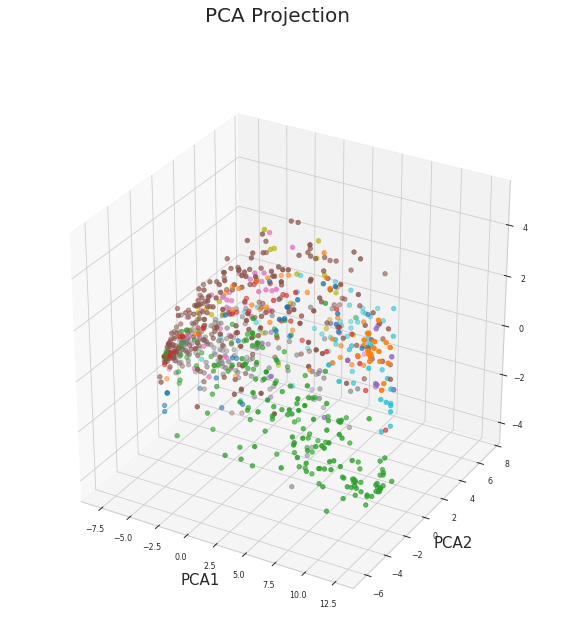

In [ ]:
# Instanciamos la figura y lo ejes
fig = plt.figure(figsize=(10,10))

# Instanciamos el PCA y transformamos los datos
pca_nmd_3d = PCA(3)
nmd_3d_PCA=pca_nmd_3d.fit_transform(f_data.fillna(np.mean(f_data)).iloc[:,:-1])

# Instanciamos la figura y ploteamos
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*nmd_3d_PCA),c=targets,cmap='tab10')

# Definimos titulos y etiquetas
plt.suptitle("PCA Projection", fontsize = 20 )
plt.xlabel("PCA1", axes=ax, fontsize=15)
plt.ylabel("PCA2", axes=ax, fontsize=15)

# Guardamos la figura
plt.savefig("PCA-3D.tiff", dpi = 300)
plt.show()

# Esta es nuestra clasificacion base
Ahora viene la parte de la verdad !!
Ahora vamos a hacer random forest para clasificar. 
Primero partiremos usando los parametros por defecto.

In [ ]:
# Debemos serparar nuesta base de datos entre sujetos de entrenamiento y testeo
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(f_data.fillna(np.mean(f_data)), 
                                                    t , test_size=0.25, 
                                                    random_state= 42)

In [ ]:
# Este es como nuestro modelo basal, es importante que vaya en la presentación

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Aca hay que hacer una busqueda con GridSearch
# Este es un hiperparametro con el que podemos jugar, n_estimators. 

rf = RandomForestClassifier(n_estimators=500, random_state=0) 
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         Ano       1.00      0.90      0.95        10
        CAPN       0.89      1.00      0.94        17
        Dysf       0.92      0.87      0.89        39
        Dyst       0.89      1.00      0.94         8
        FKRP       1.00      0.50      0.67         8
         FSH       0.89      0.89      0.89        70
     Lamina        1.00      0.91      0.95        11
       OPMD        0.85      0.94      0.89        47
      Pompe        0.86      0.78      0.82        23
      Sarco        0.62      0.73      0.67        11

    accuracy                           0.88       244
   macro avg       0.89      0.85      0.86       244
weighted avg       0.88      0.88      0.88       244



Ahora lo que realizaremos sera entrenar nuestro clasificador utilizando diferentes niveles de testeo y entrenamiento

In [ ]:
# Este codigo entrena 100 arboles para distintos valores de test y training dataset
scores_size = []
for i in range (10,100,1):
  X_train, X_test, y_train, y_test = train_test_split(f_data.fillna(np.mean(f_data)), 
                                                      t , test_size=i, stratify=t,  
                                                      random_state= 42)
  rf = RandomForestClassifier(n_estimators=500) 
  rf.fit(X_train, y_train)
  rf_score = rf.score(X_test,y_test)
  scores_size.append(rf_score)

Quizas aqui abajo debería hacer como un bootsrtrap. Y promedidar. 

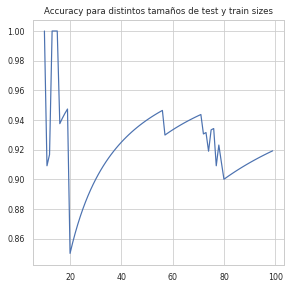

In [ ]:
# Grafica la aacuracy obtenida por cada uno de los arboles con distintos 
# procentajes de división entre 1 y 100% de test size. 
plt.plot(np.arange(10,100,1),scores_size)

# Titulos y labels
plt.title('Accuracy para distintos tamaños de test y train sizes')
ax.set_xlabel('% Conjunto de Testeo')
ax.set_ylabel('Accuracy')

# Grabar la figura
plt.savefig("test-size.tiff", dpi = 300)

Las siguientes lineas de codigo entrena modelos con diferentes numero de arboles en el randomforest.

In [ ]:
# Este codigo, entrena 30 RF, cada uno con un diferente número de arboles
# entre 50 y 1500. 
scores = []
for i in np.arange(50,1500,50):
  rf = RandomForestClassifier(n_estimators=i) 
  rf.fit(X_train, y_train)
  rf_score = rf.score(X_test,y_test)
  scores.append(rf_score)

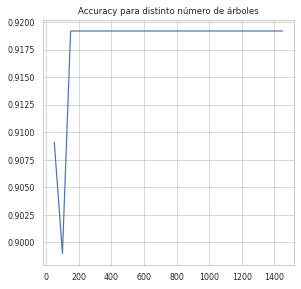

In [ ]:
plt.plot(np.arange(50,1500,50),scores)

plt.title('Accuracy para distinto número de árboles')
ax.set_xlabel('Número de árboles')
ax.set_ylabel('Accuracy')

# Grabar la figura
plt.savefig("tree-number.tiff", dpi = 300)

Esta corresponde al accuracy obtenido por nuestro clasificador en un esquema de validacion cruzada. Se puede observar que esta es menor que la obtenida por medio de la clasificacion simple del conjunto de entrenamineto. Es conocido que el esquema de CV, suele producir esto, y de este modo representa de mejor manera como se compartaria el modelo en la vida real. 

In [ ]:
from sklearn.model_selection import cross_val_score 

a = cross_val_score(rf, f_data.fillna(np.mean(f_data)) , t , cv=5)
a.mean()

0.7917948717948718

El grafico siguiente corresponde a la matriz de confusion de los resultados obtenidos por nuestro clasificador en el conjunto de test. Es interesante observar como la clase 4 esta haciendo clasificada de forma errada en el 50% de los casos, siendo clasificados un 25% como 2 y 7 para cada una de dichas clases.

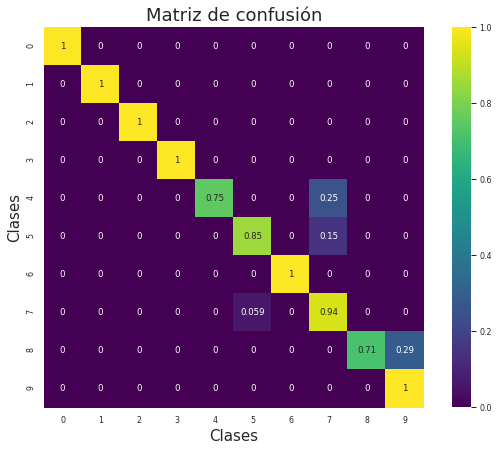

<Figure size 324x324 with 0 Axes>

In [ ]:
conf = confusion_matrix(y_test,rf.predict(X_test), normalize="true")


scatter, ax = plt.subplots(figsize = (10,7))
sns.heatmap(conf , square=True, annot=True, cmap="viridis")
ax.set_title('Matriz de confusión', fontsize = 18)
ax.set_ylabel('Clases', fontsize = 15)
ax.set_xlabel ('Clases', fontsize = 15)

# Grabar la figura
plt.show()
plt.savefig("confussion-matrix.tiff", dpi = 300)

En las siguientes lineas de codigo y asociado a los graficos que las acompañan, se puede observar la importancia relativa de los musculos para la clasificación. Una pregunta que podría ser interesante es realizar seleccion de caracteristicas y con eso volver a realizar la clasificacion, para ver si aumenta la precision al eliminar varibles que aportan más ruido que otra cosa.

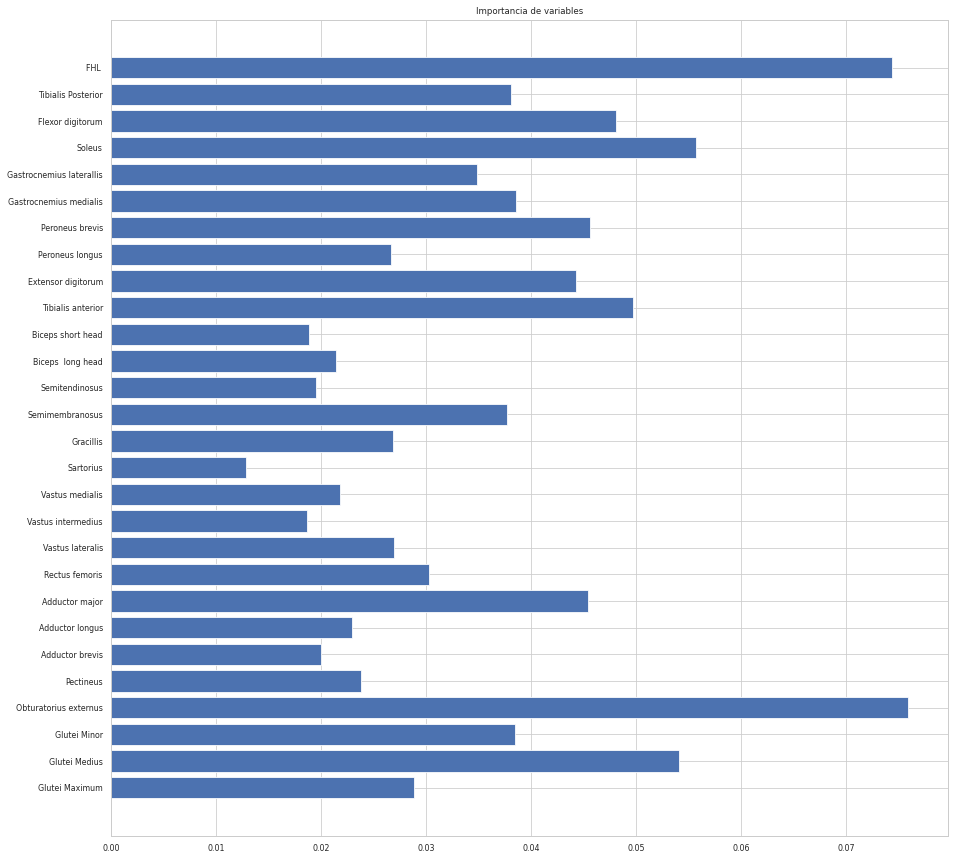

In [ ]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                    index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

ax, fig = plt.subplots(1,1, figsize=(15,15))

plt.barh(f_data.columns, rf.feature_importances_)

plt.title('Importancia de variables')

# Grabar la figura
plt.savefig("variable-importance.tiff", dpi = 300)


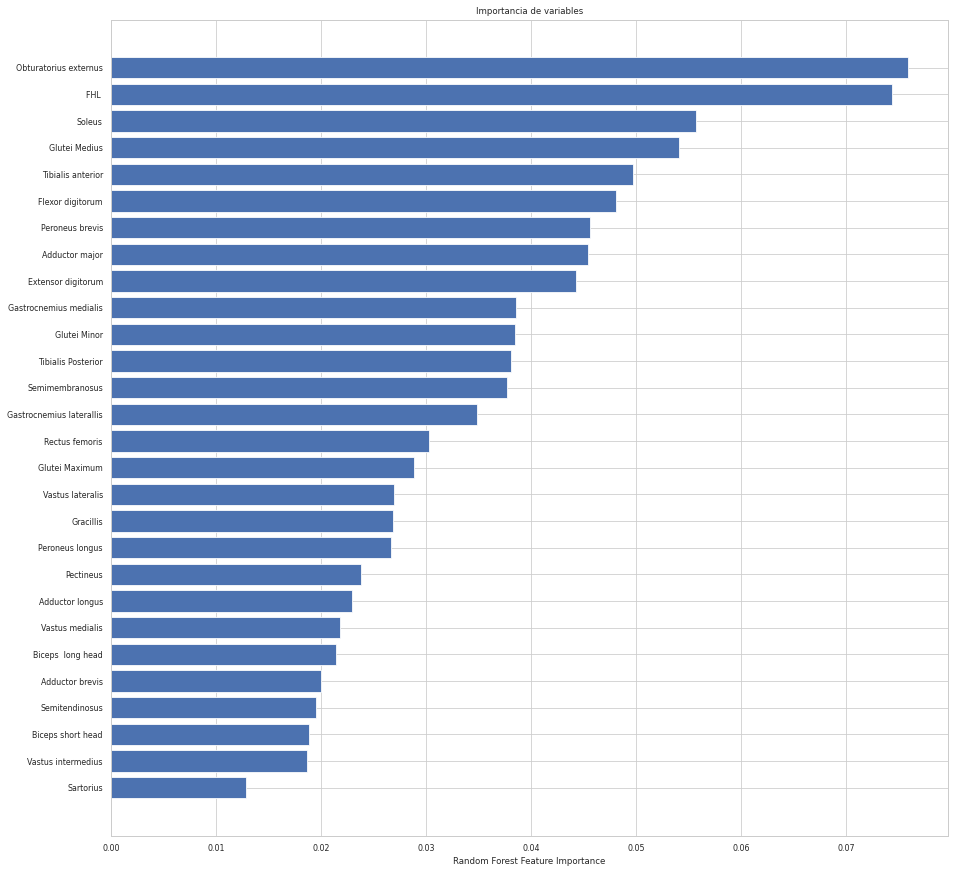

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
ax, fig = plt.subplots(1,1, figsize=(15,15))
plt.barh(f_data.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

plt.title('Importancia de variables')

# Grabar la figura
plt.savefig("variable-importance-ordered.tiff", dpi = 300)

# Esta es nuestro mejor modelo

Este es nuestro mejor clasificador. Podemos observar que balanceando las clases podemos obtener un aumento leve en la precision alcanzada por nuestro clasificador.

In [ ]:
# Ahora realizaremos estratificacióón por clases, dado que tenemos clases desbalanceadas

X_train, X_test, y_train, y_test = train_test_split(f_data.fillna(np.mean(f_data)), 
                                                    t , test_size=0.25, 
                                                    random_state= 42, stratify=t,
                                                    shuffle=True)

rf = RandomForestClassifier(n_estimators=500, random_state=0) 
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(rf.oob_score)
print(classification_report(y_test, rf_pred))

False
              precision    recall  f1-score   support

         Ano       0.88      1.00      0.93         7
        CAPN       1.00      1.00      1.00        18
        Dysf       1.00      0.84      0.92        45
        Dyst       1.00      0.92      0.96        12
        FKRP       1.00      0.78      0.88         9
         FSH       0.88      0.90      0.89        67
     Lamina        0.90      0.90      0.90        10
       OPMD        0.74      0.93      0.82        42
      Pompe        1.00      0.82      0.90        17
      Sarco        0.82      0.82      0.82        17

    accuracy                           0.89       244
   macro avg       0.92      0.89      0.90       244
weighted avg       0.90      0.89      0.89       244



# Esta es la búsqueda por grilla

Aca abajo intente hacer la busqueda por grilla pero parece que no me funciono, porque de hecho la accuracy bajo a 77. 

In [ ]:
# Para terminar vamos a realizar una busqueda por medio de grid serch para determinar
# cual es la combinación de hiperparametros que permite maximizar la posibilidad
# de clasificar correctamente las RNM de los pacientes, segun su diagnostico. 

# Importamos la clase GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instanciamos el modelo
rf = RandomForestClassifier()

# Definimos cual sera el espacio de parametros a explorar
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Realizamos la busqueda por grilla con validacion cruzada
CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
# Ahora observaremos la nueva accuracy obtenida por nuestro clasificador
# Usando los parametros encontrados por la busqueda por grilla.

CV_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}

In [ ]:
pred= CV_rf.predict(X_test)
print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred))
print(classification_report(y_test, pred))


Accuracy for Random Forest on CV data:  0.889344262295082
              precision    recall  f1-score   support

         Ano       0.88      1.00      0.93         7
        CAPN       1.00      1.00      1.00        18
        Dysf       1.00      0.84      0.92        45
        Dyst       1.00      1.00      1.00        12
        FKRP       0.88      0.78      0.82         9
         FSH       0.88      0.94      0.91        67
     Lamina        0.90      0.90      0.90        10
       OPMD        0.75      0.90      0.82        42
      Pompe        1.00      0.76      0.87        17
      Sarco        0.86      0.71      0.77        17

    accuracy                           0.89       244
   macro avg       0.91      0.88      0.89       244
weighted avg       0.90      0.89      0.89       244



# Usando el OOB **error**

In [ ]:
forest = RandomForestClassifier(n_estimators = 500, oob_score = True)
forest.fit(X_train, y_train)
print('Score: ', forest.score(X_train, y_train))
forest.oob_score_
forest.oob_decision_function_

Score:  0.9726402188782489


array([[0.        , 0.02116402, 0.06878307, ..., 0.00529101, 0.        ,
        0.10582011],
       [0.02840909, 0.04545455, 0.15909091, ..., 0.09090909, 0.        ,
        0.00568182],
       [0.        , 0.        , 0.00561798, ..., 0.63100467, 0.3015796 ,
        0.        ],
       ...,
       [0.02645503, 0.02116402, 0.37037037, ..., 0.28042328, 0.        ,
        0.06349206],
       [0.17553191, 0.42021277, 0.09574468, ..., 0.12234043, 0.        ,
        0.0106383 ],
       [0.02857143, 0.00571429, 0.64      , ..., 0.16571429, 0.        ,
        0.01714286]])

# Ahora vamos a usar todos los musculos.



In [ ]:
from pylab import rcParams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import random
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib.patches import Patch
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


random.seed(2021)

params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [4.5, 4.5]
   }
rcParams.update(params)

### Classification report

In [ ]:
# Aquí es importante utilizar coma como decimal
database = pd.read_csv("Dryad data.csv", ";", decimal = ",")

database = database.drop(["PtCODE"], axis=1)

# Separamos los conjutnos de testeo y entrenamieneto
X_train, X_test, y_train, y_test = train_test_split(database.fillna(np.mean(database)), 
                                                    t , test_size=0.25, random_state= 2021, 
                                                     stratify=t,
                                                    shuffle=True)

# Instanciamos 
rf = RandomForestClassifier(criterion= 'entropy',
 max_depth= 10,
 max_features= 'auto',
 n_estimators= 500,
 random_state= 2021) 
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         Ano       1.00      1.00      1.00         7
        CAPN       0.95      1.00      0.97        18
        Dysf       0.98      0.91      0.94        45
        Dyst       1.00      0.75      0.86        12
        FKRP       0.88      0.78      0.82         9
         FSH       1.00      1.00      1.00        67
     Lamina        0.91      1.00      0.95        10
       OPMD        0.89      0.98      0.93        42
      Pompe        0.94      1.00      0.97        17
      Sarco        0.88      0.88      0.88        17

    accuracy                           0.95       244
   macro avg       0.94      0.93      0.93       244
weighted avg       0.95      0.95      0.95       244



### Matriz de confusión

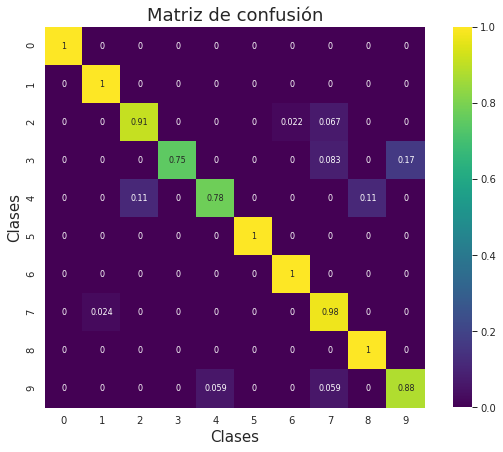

<Figure size 324x324 with 0 Axes>

In [ ]:
conf = confusion_matrix(y_test,rf.predict(X_test), normalize="true")

scatter, ax = plt.subplots(figsize = (10,7))

sns.heatmap(conf , square=True, annot=True, cmap="viridis")

ax.set_title('Matriz de confusión', fontsize = 18)
ax.set_ylabel('Clases', fontsize = 15)
ax.set_xlabel ('Clases', fontsize = 15)

plt.show()


# Grabar la figura
plt.show()
plt.savefig("confussion-matrix-allmuscles.tiff", dpi = 300)

### Cross validation scores

In [ ]:
a = cross_val_score(rf, database.fillna(np.mean(database)) , t , cv=10) 
print(a)
print(np.mean(a))
print(np.std(a))

[0.81632653 0.86734694 0.92857143 0.93877551 0.96938776 0.97938144
 0.91752577 0.93814433 0.90721649 0.86597938]
0.9128655585945719
0.04777008440642388


In [ ]:
a = cross_val_score(rf, database.fillna(np.mean(database)) , t , cv=100)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 28 members, which is less than n_splits=100.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
 print(a)
print(np.mean(a))
print(np.std(a))

[0.7        0.9        0.9        0.9        0.7        0.8
 0.9        0.8        0.9        1.         1.         0.9
 0.8        0.9        0.8        0.9        0.9        0.9
 1.         0.9        1.         0.9        1.         1.
 1.         1.         1.         0.9        0.9        1.
 1.         0.9        0.9        0.9        0.9        0.8
 1.         1.         1.         1.         0.9        1.
 1.         0.9        0.9        1.         0.9        0.9
 1.         1.         0.9        1.         1.         1.
 0.9        1.         0.9        0.8        1.         0.9
 0.8        1.         0.9        1.         0.8        1.
 1.         1.         1.         0.9        0.9        1.
 1.         1.         1.         1.         1.         0.88888889
 1.         0.88888889 1.         1.         1.         1.
 0.88888889 1.         1.         0.88888889 1.         1.
 1.         0.88888889 0.88888889 1.         1.         1.
 1.         0.88888889 1.         0.888888

### Cross validation density estimation

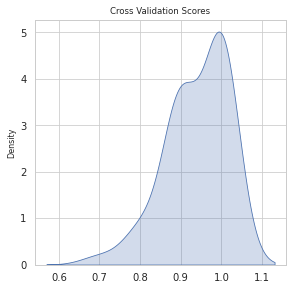

In [ ]:
sns.kdeplot(a, bw_adjust=1.5, shade="true")
plt.title("Cross Validation Scores")
plt.show()


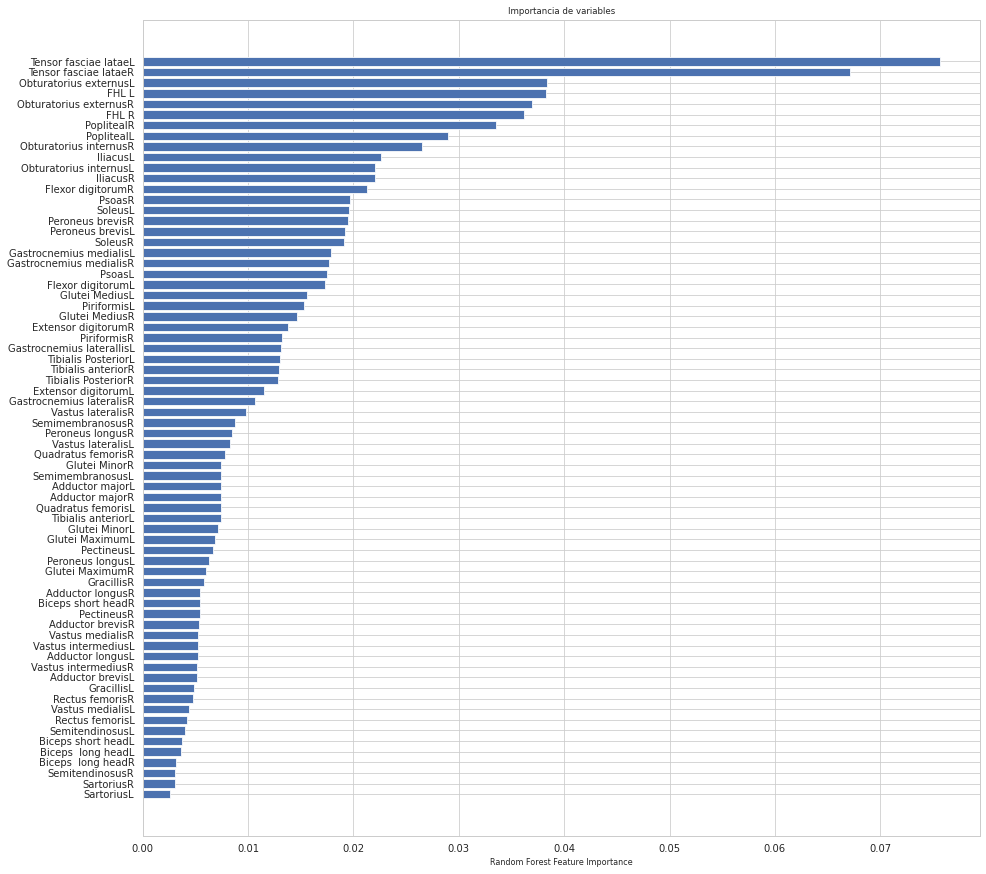

<Figure size 324x324 with 0 Axes>

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
ax, fig = plt.subplots(1,1, figsize=(15,15))
plt.barh(database.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

plt.title('Importancia de variables')

# Grabar la figura
plt.show()
plt.savefig("variableimportance-allmuscles.tiff", dpi = 300)

### T-SNE en 2D y 3D

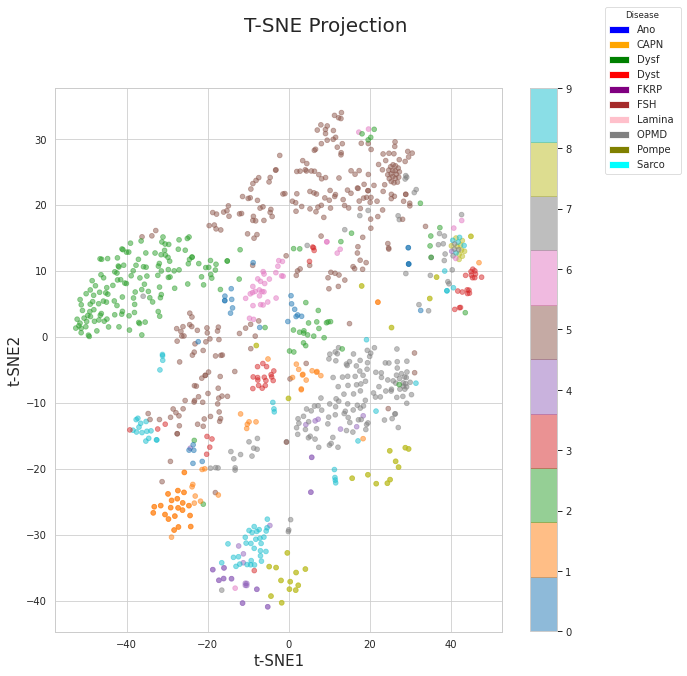

In [ ]:
# llamamos a un objeto de la clase TSNE
tsne_2d = TSNE(2, perplexity=25) # Este parametro es el que se debe ajustar. 

# Aqui realizamos una inputacióón de los datos utilizando la media. 
nmd_2d= tsne_2d.fit_transform(database.fillna(np.mean(database))  )

# Instanciamos la fiura y los ejes, y graficamos los resultados
fig, ax = plt.subplots(1,1, figsize=(10,10))
plt.scatter(
    nmd_2d[:,0],
    nmd_2d[:,1],
    c= targets,
    alpha = 0.5,
    cmap='tab10'
)

# Aca instanciamos la legenda y la barra de colores del grafico
plt.colorbar()
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "grey", "olive", "cyan"] 
lut = dict(zip(list(le.classes_), colors))
row_colors = pd.Series(t).map(lut)
handles = [Patch(facecolor=lut[name]) for name in lut]
plt.legend(handles, lut, title='Disease',
           bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

# Aca definimos el titulo y los ejes
plt.suptitle("T-SNE Projection", fontsize = 20 )
plt.xlabel('t-SNE1', axes=ax, fontsize=15)
plt.ylabel('t-SNE2', axes=ax, fontsize=15)

plt.savefig("t-sne-2D-allmuscles.tiff", dpi = 300)


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 975 samples in 0.007s...
[t-SNE] Computed neighbors for 975 samples in 0.189s...
[t-SNE] Computed conditional probabilities for sample 975 / 975
[t-SNE] Mean sigma: 2.086060
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.776825
[t-SNE] KL divergence after 1000 iterations: 0.741035


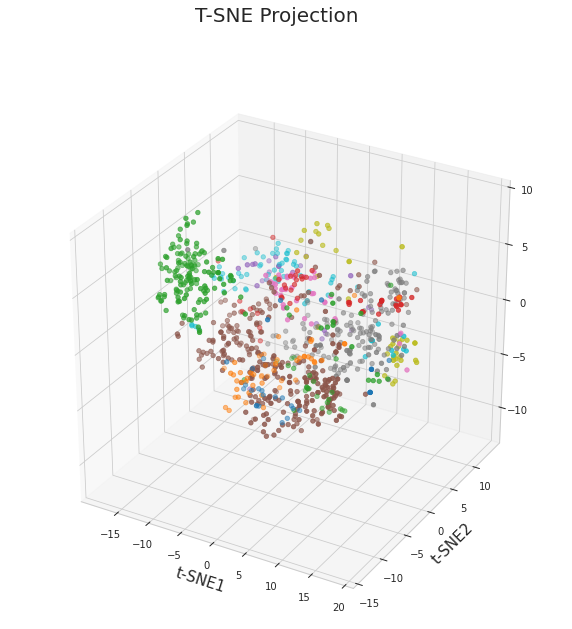

In [ ]:
# Instanciamos el objeto TSNE, defimos la perplejidad en 24 e imputamos la media 
# en los datos
tsne3d = TSNE(3, perplexity = 25,verbose=1)
nmd_3d = tsne3d.fit_transform(database.fillna(np.mean(database))  )

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*zip(*nmd_3d),c=targets,cmap='tab10')

plt.suptitle("T-SNE Projection", fontsize = 20 )
plt.xlabel('t-SNE1', axes=ax, fontsize=15)
plt.ylabel('t-SNE2', axes=ax, fontsize=15)

plt.savefig("t-sne-3D-allmuscles.tiff", dpi = 300)
plt.show()

### Distintos tamaños de entrenamiento y testeo

In [ ]:
# Este codigo entrena 490 arboles para distintos valores de test y training dataset
# Este codigo entrena 100 arboles para distintos valores de test y training dataset
scores_size = []
for i in range (10,95,1):
  X_train, X_test, y_train, y_test = train_test_split(f_data.fillna(np.mean(f_data)), 
                                                      t , test_size=i, random_state=1)  
  for j in range(20):                                                      
    rf = RandomForestClassifier(n_estimators=50) 
    rf.fit(X_train, y_train)
    rf_score = rf.score(X_test,y_test)
    scores_size.append(rf_score)

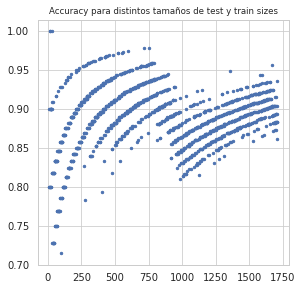

In [ ]:
# Grafica la aacuracy obtenida por cada uno de los arboles con distintos 
# procentajes de división entre 1 y 100% de test size. 
plt.plot(np.arange(10,1710,1),scores_size, ".")

# Titulos y labels
plt.title('Accuracy para distintos tamaños de test y train sizes')
ax.set_xlabel('% Conjunto de Testeo')
ax.set_ylabel('Accuracy')
ax.set_ylim(0.85,1)

# Grabar la figura
plt.savefig("test-size.tiff", dpi = 300)

In [ ]:
# Este codigo, entrena 30 RF, cada uno con un diferente número de arboles
# entre 50 y 1500. 
scores = []
for i in np.arange(10,100,2):
  rf = RandomForestClassifier(n_estimators=i) 
  rf.fit(X_train, y_train)
  rf_score = rf.score(X_test,y_test)
  scores.append(rf_score)

### Numero de arboles optimos

ValueError: ignored

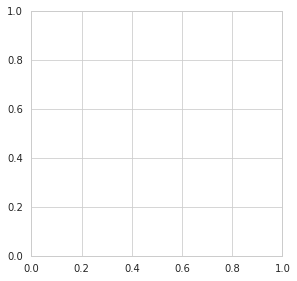

In [ ]:
plt.plot(np.arange(1,100,2),scores)

plt.title('Accuracy para distinto número de árboles')
ax.set_xlabel('Número de árboles')
ax.set_ylabel('Accuracy')

# Grabar la figura
plt.savefig("tree-number.tiff", dpi = 300)

### Matriz de correlación 

In [ ]:
sns.clustermap(database.corr())